In [21]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
from scipy.optimize import curve_fit
from collections import defaultdict
from scipy.spatial.distance import cdist
mpl.rcParams['axes.linewidth'] = 2
from DEPENDENCIES.recycle import *
from matplotlib.ticker import FormatStrFormatter
from svg2emf import svg2emf

In [2]:
def read_text_timemap(fname, tini=0, tfin=1000000):
    f = open(fname, "r")
    fl = f.readlines()
    f.close()
    data = defaultdict(list)
    time = -1
    for line in fl:
        if "#T - >" in line:
            time = int(float(line.split()[3]))
        if time >= tini and time <= tfin:
            if "#" not in line and "@" not in line:
                data[time].append(line.split())
    data = [frame for frame in data.values()]
    data = np.array(data, dtype='float')
    data_mean = np.mean(data, axis=0)
    data_std = np.std(data, axis=0)
    print("Done with {}".format(fname))
    return data_mean, data_std

In [3]:
p5_thick, p5_thick_std = read_text_timemap("THICK/POPC5-35_PRO1_thick_map.sfu", tini=0, tfin=1000000)
p6_thick, p6_thick_std = read_text_timemap("THICK/POPC6-35_PRO1_thick_map.sfu", tini=0, tfin=1000000)
g5_thick, g5_thick_std = read_text_timemap("THICK/gH-POPC5-46_PRO1_thick_map.sfu", tini=780000, tfin=1000000)
g6_thick, g6_thick_std = read_text_timemap("THICK/gH-POPC6-46_PRO1_thick_map.sfu", tini=50000, tfin=1000000)
n05_thick, n05_thick_std = read_text_timemap("THICK/NP610-POPC5-46_PRO1-8_thick_map.sfu", tini=1329000, tfin=2000000)
n06_thick, n06_thick_std = read_text_timemap("THICK/NP610-POPC6-46_PRO1_thick_map.sfu", tini=215000, tfin=1000000)
n15_thick, n15_thick_std = read_text_timemap("THICK/NP61-POPC5-46_PRO3_thick_map.sfu", tini=2895000, tfin=3000000)
n161_thick, n161_thick_std = read_text_timemap("THICK/NP61-POPC6-46_PRO1_thick_map.sfu", tini=126000, tfin=864000)
n162_thick, n162_thick_std = read_text_timemap("THICK/NP61-POPC6-46_PRO1_thick_map.sfu", tini=864000, tfin=1000000)

Done with THICK/POPC5-35_PRO1_thick_map.sfu
Done with THICK/POPC6-35_PRO1_thick_map.sfu
Done with THICK/gH-POPC5-46_PRO1_thick_map.sfu
Done with THICK/gH-POPC6-46_PRO1_thick_map.sfu
Done with THICK/NP610-POPC5-46_PRO1-8_thick_map.sfu
Done with THICK/NP610-POPC6-46_PRO1_thick_map.sfu
Done with THICK/NP61-POPC5-46_PRO3_thick_map.sfu
Done with THICK/NP61-POPC6-46_PRO1_thick_map.sfu
Done with THICK/NP61-POPC6-46_PRO1_thick_map.sfu


In [4]:
print("POPC")
average_map(p5_thick, 1000) #1000 to grab the whole grid
average_map(p5_thick_std, 1000) #1000 to grab the whole grid
print("POPC:CHOL")
average_map(p6_thick, 1000) #1000 to grab the whole grid
average_map(p6_thick_std, 1000) #1000 to grab the whole grid
print("POPC -> gH-local")
average_map(g5_thick, 6)#6 pixels is 1.56 nm
average_map(g5_thick_std, 6)#6 pixels is 1.56 nm
print("POPC:CHOL -> gH-local")
average_map(g6_thick, 6)#6 pixels is 1.56 nm
average_map(g6_thick_std, 6)#6 pixels is 1.56 nm
print("POPC -> NP0-local")
average_map(n05_thick, 6)#6 pixels is 1.56 nm
average_map(n05_thick_std, 6)#6 pixels is 1.56 nm
print("POPC:CHOL -> NP0-local")
average_map(n06_thick, 6)#6 pixels is 1.56 nm
average_map(n06_thick_std, 6)#6 pixels is 1.56 nm
print("POPC -> gHNP-local")
average_map(n15_thick, 6)#6 pixels is 1.56 nm
average_map(n15_thick_std, 6)#6 pixels is 1.56 nm
print("POPC:CHOL -> gHNP-local (Binding mode 1)")
average_map(n161_thick, 6)#6 pixels is 1.56 nm
average_map(n161_thick_std, 6)#6 pixels is 1.56 nm
print("POPC:CHOL -> gHNP-local (Binding mode 2)")
average_map(n162_thick, 6)#6 pixels is 1.56 nm
average_map(n162_thick_std, 6)#6 pixels is 1.56 nm

POPC
3.975 +/- 0.008
0.184 +/- 0.002
POPC:CHOL
4.351 +/- 0.009
0.152 +/- 0.002
POPC -> gH-local
3.972 +/- 0.005
0.183 +/- 0.003
POPC:CHOL -> gH-local
4.333 +/- 0.01
0.154 +/- 0.002
POPC -> NP0-local
4.578 +/- 0.188
0.205 +/- 0.011
POPC:CHOL -> NP0-local
5.403 +/- 0.195
0.353 +/- 0.025
POPC -> gHNP-local
3.983 +/- 0.18
0.23 +/- 0.03
POPC:CHOL -> gHNP-local (Binding mode 1)
4.187 +/- 0.111
0.205 +/- 0.031
POPC:CHOL -> gHNP-local (Binding mode 2)
4.412 +/- 0.182
0.215 +/- 0.029


In [5]:
p_thicks = [p5_thick, p6_thick]
g_thicks = [g5_thick, g6_thick]
n0_thicks = [n05_thick, n06_thick]
n11_thicks = [n15_thick, n161_thick]
n12_thicks = [n15_thick, n162_thick]

In [6]:
def get_min(data, data_std, func=np.argmin):
    min_ndx = func(data)
    print("{:.3f} +\- {:.3f}".format(data.flatten()[min_ndx], data_std.flatten()[min_ndx]))
get_min(n15_thick, n15_thick_std)
get_min(n15_thick, n15_thick_std, func=np.argmax)
get_min(n162_thick, n162_thick_std)
get_min(n162_thick, n162_thick_std, func=np.argmax)

3.551 +\- 0.217
4.224 +\- 0.186
4.058 +\- 0.164
4.879 +\- 0.187


In [7]:
def plot_thick(thicks, means=[3.975, 4.351], delta=0.3, cmap='seismic', fname='tmp'):
    fig, axs = plt.subplots(figsize=(9,3), ncols=2, subplot_kw={'xticks':[0,24,49], 'yticks':[0,24,49], 'xticklabels':['-7.0','0.0','+7.0'], 'yticklabels':['+7.0','0.0','-7.0']}, gridspec_kw={'wspace':0.4})
    for ax, thick, ave in zip(axs.flatten(), thicks, means):
        ax.tick_params(labelsize=Z)
        ax.set_xlabel("X-axis (nm)", fontsize=Z)
        ax.set_ylabel("Y-axis (nm)", fontsize=Z)
        cax = ax.imshow(thick, cmap=cmap, vmin=ave-delta, vmax=ave+delta, interpolation='bilinear')
    a = plt.axes([0.95, 0.14, 0.04, 0.75])
    cbar = fig.colorbar(cax, ax=a, cax=a, ticks=[ave-delta,ave,ave+delta])
    #cbar.ax.set_yticklabels(["-{:.1f} nm".format(delta), "Mean", "+{:.1f} nm".format(delta)])
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    cbar.ax.tick_params(labelsize=Z)
    cbar.ax.set_ylabel("Thickness (nm)", fontsize=Z)
    plt.savefig("Plots/{}_thick.png".format(fname), format='png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()
    plt.close()

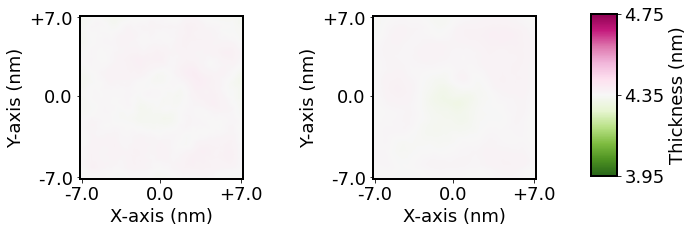

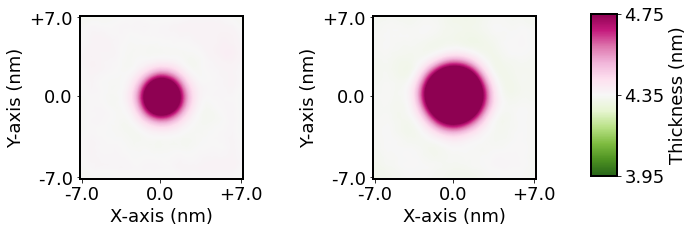

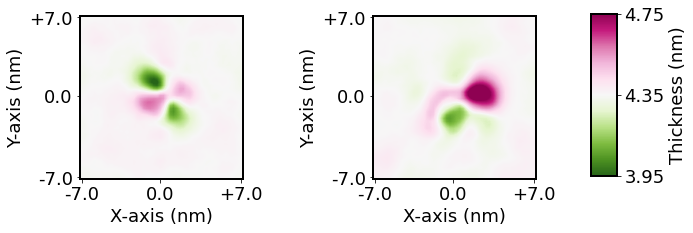

In [8]:
plot_thick([g5_thick, g6_thick], fname='gH', delta=0.4, cmap='PiYG_r')
plot_thick([n05_thick, n06_thick], fname='NP0', delta=0.4, cmap='PiYG_r')
plot_thick([n15_thick, n162_thick], fname='gHNP', delta=0.4, cmap='PiYG_r')

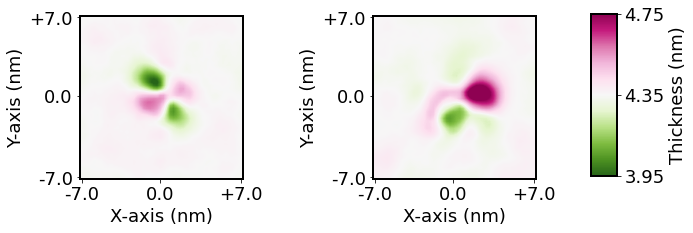

In [9]:
#plot_thick(n0_thicks, fname='NP0', delta=1.0, cmap='PiYG_r')
plot_thick(n12_thicks, fname='gHNP', delta=0.4, cmap='PiYG_r')

POPC/POPC:CHOL


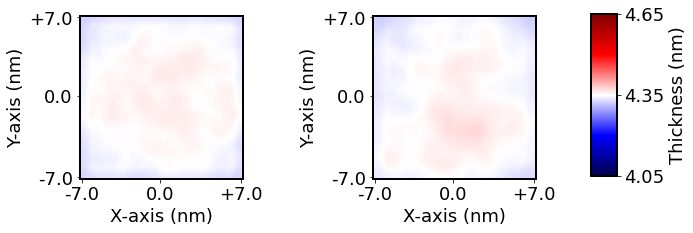

gH with/without cholesterol


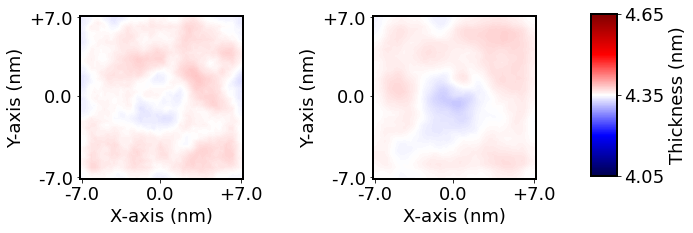

NP0 with/without cholesterol


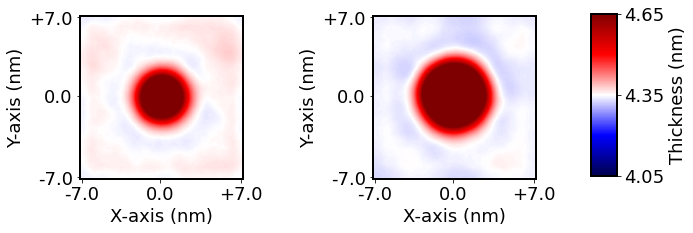

gHNP with/without cholesterol (Binding mode 1)


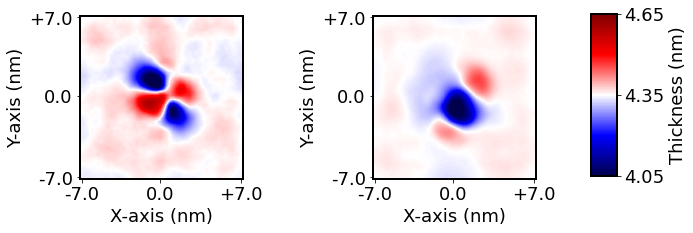

gHNP with/without cholesterol (Binding mode 2)


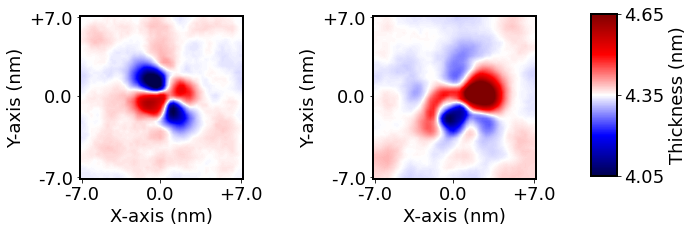

In [10]:
print("POPC/POPC:CHOL")
plot_thick(p_thicks)
print("gH with/without cholesterol")
plot_thick(g_thicks)
print("NP0 with/without cholesterol")
plot_thick(n0_thicks)
print("gHNP with/without cholesterol (Binding mode 1)")
plot_thick(n11_thicks)
print("gHNP with/without cholesterol (Binding mode 2)")
plot_thick(n12_thicks)

In [11]:
def read_text_radial_from_maps(fname, tini=0, tfin=1000000, L=15):
    f = open(fname, "r")
    fl = f.readlines()
    f.close()
    data = defaultdict(list)
    time = -1
    for line in fl:
        if "#T - >" in line:
            time = int(float(line.split()[3]))
        if time >= tini and time <= tfin:
            if "#" not in line and "@" not in line:
                data[time].append(line.split())
    data = [frame for frame in data.values()]
    data = np.array(data, dtype='float')
    
    ly, lx = data.shape[1], data.shape[2]
    dl = L / lx
    NDX_X, NDX_Y = np.meshgrid(np.linspace(0,lx-1,lx, dtype='int'), np.linspace(0,ly-1,ly, dtype='int'))
    NDX_X, NDX_Y = NDX_X - lx//2, NDX_Y - ly//2
    R = np.sqrt(NDX_X**2 + NDX_Y**2)
    ave_r, std_r = [], []
    for r in np.unique(R):
        mask = R==r
        ave = np.mean(data[:,mask])
        std = np.std(data[:,mask])
        ave_r.append(ave)
        std_r.append(std)
    R = np.unique(R)*dl
    print("Done with {}".format(fname))
    return R, ave_r, std_r    

In [12]:
n05_thick_r = read_text_radial_from_maps("THICK/NP610-POPC5-46_PRO1-8_thick_map.sfu", tini=1329000, tfin=2000000, L=15.0)
n06_thick_r = read_text_radial_from_maps("THICK/NP610-POPC6-46_PRO1_thick_map.sfu", tini=215000, tfin=1000000, L=12.0)
#n15_thick_r = read_text_radial_from_maps("THICK/NP61-POPC5-46_PRO3_thick_map.sfu", tini=2895000, tfin=3000000, L=15.0)
#n161_thick_r = read_text_radial_from_maps("THICK/NP61-POPC6-46_PRO1_thick_map.sfu", tini=126000, tfin=864000, L=12.0)
#n162_thick_r = read_text_radial_from_maps("THICK/NP61-POPC6-46_PRO1_thick_map.sfu", tini=864000, tfin=1000000, L=12.0)

Done with THICK/NP610-POPC5-46_PRO1-8_thick_map.sfu
Done with THICK/NP610-POPC6-46_PRO1_thick_map.sfu


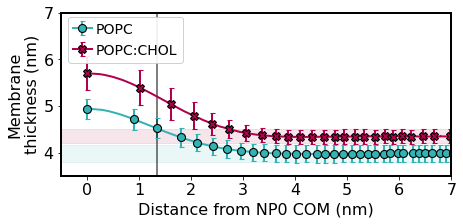

In [27]:
Z=16
every = 6
fig = plt.figure(figsize=(7,3))
ax = plt.axes()
ax.set_xlim(-0.5,7)
ax.set_ylim(3.5,7)
ax.set_xticks(range(8))
ax.tick_params(labelsize=Z)
ax.set_xlabel("Distance from NP0 COM (nm)", fontsize=Z)
ax.set_ylabel("Membrane\nthickness (nm)", fontsize=Z)
ax.fill_between([-0.5,7],3.975-0.184, 3.975+0.184, color=(0.2,0.7,0.7), alpha=0.1)
ax.fill_between([-0.5,7],4.351-0.152, 4.351+0.152, color=(0.7,0.0,0.3), alpha=0.1)
ax.axvline(1.35, lw=2, c='k', alpha=0.5)
ax.errorbar(*n05_thick_r[:2], yerr=n05_thick_r[2], mew=1.1, markevery=every, errorevery=every, fmt='-o', ms=8, lw=2, mec='k', color=(0.2,0.7,0.7), capsize=2.5, label='POPC')
ax.errorbar(*n06_thick_r[:2], yerr=n06_thick_r[2], mew=1.1, markevery=every+5, errorevery=every+5, fmt='-X', ms=8, lw=2, mec='k', color=(0.7,0.0,0.3), capsize=2.5, label='POPC:CHOL')
ax.legend(fontsize=Z-2, mode='expand', bbox_to_anchor=(0., 0.65,0.33,0.6), loc='lower left', framealpha=0.9, handletextpad=0.3, handlelength=1.3)
plt.savefig("Plots/NP0_thickr.png", format='png', dpi=300, bbox_inches='tight', transparent=True)
plt.savefig("Plots/NP0_thickr.svg", format='svg', bbox_inches='tight')
svg2emf("Plots/NP0_thickr.svg")
plt.show()
plt.close()

In [14]:
n15_pt_thick, n15_pt_thick_std = read_text_timemap("THICK/NP61-POPC5-46_PRO1-3_Pt_thick_map.sfu", tini=2895000, tfin=3000000)
n162_pt_thick, n162_pt_thick_std = read_text_timemap("THICK/NP61-POPC6-46_PRO1_Pt_thick_map.sfu", tini=864000, tfin=1000000)

Done with THICK/NP61-POPC5-46_PRO1-3_Pt_thick_map.sfu
Done with THICK/NP61-POPC6-46_PRO1_Pt_thick_map.sfu


In [15]:
print("POPC -> gHNP-local")
average_map(n15_pt_thick, 6)#6 pixels is 1.56 nm
average_map(n15_pt_thick_std, 6)#6 pixels is 1.56 nm
print("POPC:CHOL -> gHNP-local (Binding mode 2)")
average_map(n162_pt_thick, 6)#6 pixels is 1.56 nm
average_map(n162_pt_thick_std, 6)#6 pixels is 1.56 nm

POPC -> gHNP-local
3.984 +/- 0.194
0.219 +/- 0.026
POPC:CHOL -> gHNP-local (Binding mode 2)
4.532 +/- 0.229
0.219 +/- 0.023


In [16]:
n12_pt_thicks = [n15_pt_thick, n162_pt_thick]

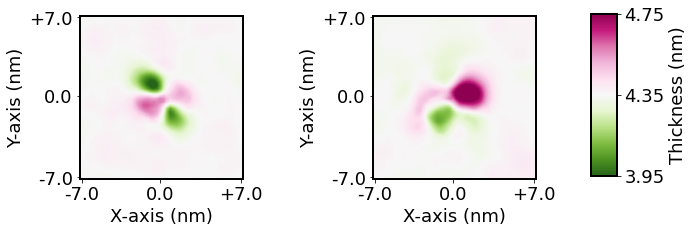

In [17]:
plot_thick(n12_pt_thicks, fname='gHNP_Pt', delta=0.4, cmap='PiYG_r')